In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
data = df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
data['DistrictId']=data['DistrictId'].astype('category')

In [6]:
data.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
data.loc[data['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [8]:
data.loc[1497, 'HouseYear']=2008
data.loc[4189, 'HouseYear']=1968

In [9]:
data.loc[data['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [10]:
data.loc[377,'Rooms']=2
data.loc[1454,'Rooms']=1
data.loc[8849,'Rooms']=2

In [11]:
data['Rooms'].loc[data['Rooms']<1]=1

In [12]:
data.loc[data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,1.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [13]:
# убираем выбросы по площади
def prep_square(df):
    df.loc[df['Square']>(df['Rooms']*45+20),'Square']=df['Rooms']*45+20
    df.loc[df['Square']<(df['Rooms']*15+5),'Square']=df['Rooms']*15+5
    return df

In [14]:
data=prep_square(data)

In [15]:
data.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.887900,56.026652,37.199645,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,0.812527,18.525413,86.241209,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,1.000000,20.000000,0.370619,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.784790,22.769832,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.535436,32.781260,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.713080,45.128803,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,6.000000,245.000000,7480.592129,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [16]:
data.loc[data['LifeSquare']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1981,7917,27,1.0,65.000000,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,245.000000,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,65.000000,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,110.000000,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
9910,16568,27,4.0,200.000000,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


In [17]:
data.loc[590, 'LifeSquare']=26.6
data.loc[4328, 'LifeSquare']=74.8
data.loc[4690, 'LifeSquare']=41
data.loc[8437, 'LifeSquare']=46.14

In [18]:
def prep_lifesquare(df, df_source):
    df['LifeSquare']=df['LifeSquare'].fillna(df_source['LifeSquare'].mean())
    df.loc[df['LifeSquare']<15,'LifeSquare']=15
    df.loc[(df['LifeSquare']>200) & (df['LifeSquare']>df['Square']),'LifeSquare']=df['Square']-20
    return df

In [19]:
data=prep_lifesquare(data,data)

In [20]:
data.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.887900,56.026652,36.301203,6.273300,8.526700,12.609400,1984.86600,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,0.812527,18.525413,15.305415,28.560917,5.241148,6.775974,18.41187,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,1.000000,20.000000,15.000000,0.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.784790,25.527399,1.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.535436,36.131089,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.713080,41.421759,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,6.000000,245.000000,233.949309,2014.000000,42.000000,117.000000,2020.00000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [482]:
data.loc[data['HouseYear']<1920]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
910,6751,172,2.0,56.172364,28.384213,7.0,8,8.0,1914,0.000000,B,B,7,1660,39,1786.0,1,5,B,423580.477982
1380,15193,195,3.0,75.564709,44.872616,9.0,5,7.0,1917,0.015017,B,B,17,3079,59,2890.0,0,8,B,486057.129888
1386,12229,180,2.0,76.083312,48.026246,14.0,6,6.0,1918,0.037316,B,B,32,6748,93,562.0,4,10,B,431701.914829
2554,10919,190,2.0,47.489415,35.564479,4.0,5,5.0,1918,0.000000,B,B,30,7538,87,4702.0,5,5,B,537979.657509
2608,12329,51,2.0,52.665130,30.099008,8.0,4,4.0,1919,0.015017,B,B,17,3079,59,2890.0,0,8,B,90314.532343
2656,14556,183,4.0,151.150660,98.187482,13.5,6,7.0,1912,0.037316,B,B,32,6748,93,562.0,4,10,B,284884.959104
2902,14543,120,4.0,96.730985,53.589223,17.0,4,5.0,1918,0.000699,B,B,14,3369,24,4129.0,0,3,B,376419.535842
4904,462,43,1.0,44.082183,27.717690,7.0,4,5.0,1919,0.212515,B,B,19,3293,16,628.0,3,7,B,321506.277104
5016,15375,182,2.0,67.838861,65.200025,9.0,7,8.0,1918,0.015017,B,B,17,3079,59,2890.0,0,8,B,443270.817520
5053,10439,104,1.0,35.507738,20.312725,4.0,6,6.0,1917,0.000078,B,B,22,6398,141,1046.0,3,23,B,236830.764637


In [22]:
data['Healthcare_1']=data['Healthcare_1'].fillna(0)

In [23]:
data.loc[(data['HouseFloor']<data['Floor']), 'HouseFloor']=data['Floor']

In [24]:
data['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [25]:
data.loc[data['KitchenSquare']>20, 'KitchenSquare']=9*1.5
data.loc[data['KitchenSquare']<4, 'KitchenSquare']=4

## Разбиваем дата-сет и создаем новые признаки

In [26]:
data_test, data_valid = train_test_split(data, test_size=0.3, random_state=100)

In [27]:
# средняя цена за квадратный метр по району и количеству комнат

In [28]:
data_test['Price_per_meter_temp']=data_test['Price']/data_test['Square']

In [29]:
data_test.head(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Price_per_meter_temp
1191,13182,1,3.0,81.107658,36.131089,4.0,10,17.0,1977,0.007122,...,B,1,264,0,0.0,0,1,B,250381.580780,3087.027627
4458,10195,27,3.0,50.841082,34.225561,8.0,7,12.0,2013,0.072158,...,B,2,629,1,0.0,0,0,A,143545.018507,2823.406037


In [30]:
price_per_meter = data_test.groupby(['DistrictId', 'Rooms'])[['Price_per_meter_temp']].mean().rename(columns=({'Price_per_meter_temp': 'Price_per_meter'}))

In [31]:
data_test=data_test.drop('Price_per_meter_temp', axis=1)

In [32]:
data_test=pd.merge(data_test, price_per_meter, on=['DistrictId', 'Rooms'], how='left')

In [33]:
data_valid=pd.merge(data_valid, price_per_meter, on=['DistrictId', 'Rooms'], how='left')

In [34]:
data_valid['Price_per_meter']=data_valid['Price_per_meter'].fillna(data_test['Price_per_meter'].mean())

####  кластеризация

#### 1.1

In [355]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [356]:
scalerMM = MinMaxScaler()

In [357]:
scaled_feats=scalerMM.fit_transform(data_test.loc[:,['HouseYear', 'Social_1']])

In [358]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(scaled_feats)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

328.45895047985425
221.99530627111994
144.04010411992422
102.80289139201778
76.69607166721036
64.69483633385525
54.34979357526326
45.877910484837855


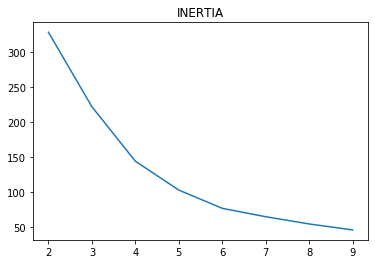

In [359]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA');

In [360]:
ac_model=AgglomerativeClustering(n_clusters=5)

In [361]:
data_test['social_claster']=ac_model.fit_predict(scaled_feats)

Text(0, 0.5, 'Social_1')

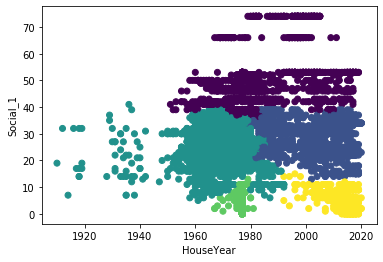

In [362]:
plt.scatter(data_test['HouseYear'],data_test['Social_1'],c=data_test['social_claster'])
plt.xlabel('HouseYear')
plt.ylabel('Social_1')

In [363]:
knn1=KNeighborsClassifier(n_neighbors=5)

In [367]:
%%time
knn1.fit(scaled_feats,data_test['social_claster'])

Wall time: 5.96 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [368]:
valid_scaled_feats=scalerMM.transform(data_valid.loc[:,['HouseYear', 'Social_1']])

In [375]:
data_valid['social_claster']=knn1.predict(valid_scaled_feats)

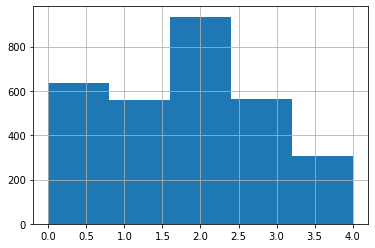

In [376]:
data_valid.social_claster.hist(bins=5);

In [377]:
data_test['social_claster']=data_test['social_claster'].astype('object')
data_valid['social_claster']=data_valid['social_claster'].astype('object')

#### 1.2

In [378]:
distr_scaled=scalerMM.fit_transform(data_test.loc[:,['DistrictId','Shops_1']])

In [379]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(distr_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

361.65664301608535
201.7504867973393
153.09378628156153
118.77536857111275
101.00431938744231
85.03646673839707
70.40866874984403
61.99273001829328


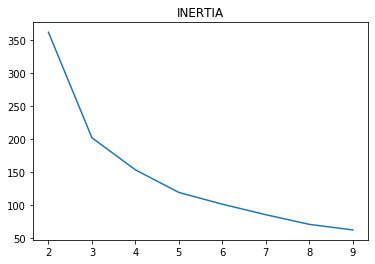

In [380]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA');

In [381]:
ac_model=AgglomerativeClustering(n_clusters=5)

In [382]:
data_test['distr_scaled']=ac_model.fit_predict(distr_scaled)

Text(0, 0.5, 'Shops_1')

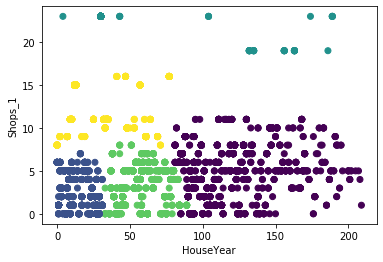

In [383]:
plt.scatter(data_test['DistrictId'],data_test['Shops_1'],c=data_test['distr_scaled'])
plt.xlabel('HouseYear')
plt.ylabel('Shops_1')

In [384]:
knn2=KNeighborsClassifier(n_neighbors=5)

In [385]:
%%time
knn2.fit(distr_scaled,data_test['distr_scaled'])

Wall time: 3.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [386]:
valid_distr_scaled=scalerMM.transform(data_valid.loc[:,['DistrictId', 'Shops_1']])

In [387]:
data_valid['distr_scaled']=knn2.predict(valid_distr_scaled)

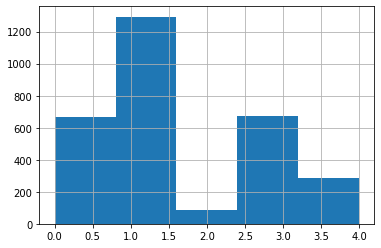

In [388]:
data_valid.distr_scaled.hist(bins=5);

In [389]:
data_test['distr_scaled']=data_test['distr_scaled'].astype('object')
data_valid['distr_scaled']=data_valid['distr_scaled'].astype('object')

In [390]:
data.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0.0,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,4.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [452]:
features=['Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','Price_per_meter','distr_scaled',
          'social_claster', 'Ecology_2','Ecology_3', 'Healthcare_1', 'Helthcare_2', 'Shops_2']


In [453]:
y_data_test=data_test['Price']
x_data_test=data_test.loc[:, features]
y_data_valid=data_valid['Price']
x_data_valid=data_valid.loc[:, features]

In [456]:
x_data_test=pd.get_dummies(x_data_test)
x_data_valid=pd.get_dummies(x_data_valid)

## Лес

In [394]:
params={
        'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75],
        'max_depth':[3,5,7]    
        }

In [395]:
regr=GridSearchCV(RFR(),param_grid=params,cv=10)

In [396]:
%%time
regr.fit(x_data_test,y_data_test);

Wall time: 2min 29s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
      

In [397]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 75}

In [398]:
model=RFR(max_depth=7, min_samples_leaf=3,n_estimators=75)

In [399]:
model.fit(x_data_test,y_data_test);

In [400]:
y_pred=model.predict(x_data_valid)

In [401]:
r2_score(data_valid['Price'],y_pred)

0.6711908844770802

### предсказываем на тестовом файле

In [402]:
test_df=pd.read_csv('test.csv')

In [403]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [404]:
test_df.loc[test_df['DistrictId']>209, 'DistrictId']=209

In [405]:
test_df['DistrictId']=test_df['DistrictId'].astype('category')

In [406]:
test_df.loc[data['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [407]:
test_df.loc[test_df['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [408]:
test_df.loc[3398, 'Rooms']=2

In [409]:
test_df['Rooms'].loc[test_df['Rooms']<1]=1

In [410]:
test_df=prep_square(test_df)

In [411]:
test_df=prep_lifesquare(test_df, data)

In [412]:
test_df.loc[test_df['LifeSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [413]:
test_df['Healthcare_1']=test_df['Healthcare_1'].fillna(0)

In [414]:
test_df.loc[(test_df['HouseFloor']<test_df['Floor']), 'HouseFloor']=test_df['Floor']

In [415]:
test_df['KitchenSquare'].describe()

count    5000.000000
mean        5.976800
std         9.950018
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       620.000000
Name: KitchenSquare, dtype: float64

In [416]:
test_df.loc[test_df['KitchenSquare']>20, 'KitchenSquare']=9*1.5
test_df.loc[test_df['KitchenSquare']<4, 'KitchenSquare']=4

##### добавляем новые признаки

In [417]:
test_df=pd.merge(test_df, price_per_meter, on=['DistrictId', 'Rooms'], how='left')

In [418]:
test_df['Price_per_meter']=test_df['Price_per_meter'].fillna(test_df['Price_per_meter'].mean())

In [474]:
scaled_feats_test=scalerMM.fit_transform(test_df.loc[:,['HouseYear', 'Social_1']])
test_df['social_claster']=knn1.predict(scaled_feats_test)
test_df['social_claster']=test_df['social_claster'].astype('object')

In [475]:
distr_scaled_test=scalerMM.fit_transform(test_df.loc[:,['DistrictId','Shops_1']])
test_df['distr_scaled']=knn2.predict(distr_scaled_test)
test_df['distr_scaled']=test_df['distr_scaled'].astype('object')

In [476]:
x_test_df=test_df.loc[:, features]

In [477]:
x_test_df=pd.get_dummies(x_test_df)


In [479]:
test_df['Price']=model.predict(x_test_df)

In [484]:
test_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price_per_meter,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.278000,1.907400,56.300088,36.395269,6.708900,8.632000,13.395000,1984.392600,0.119874,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,3904.837825,215079.977620
std,4832.674037,44.175149,0.810282,18.564602,14.938945,2.668077,5.483228,6.231945,18.573149,0.120070,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,987.304641,80085.189938
min,1.000000,0.000000,1.000000,20.000000,15.000000,4.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1599.948655,68282.436957
25%,4221.750000,21.000000,1.000000,41.920449,25.850152,4.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,3028.963167,165225.639491
50%,8320.500000,37.000000,2.000000,52.924953,36.301203,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,3948.631727,193257.045036
75%,12598.250000,77.000000,2.000000,65.976417,41.760597,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,4563.540724,242724.570802
max,16795.000000,209.000000,6.000000,223.453689,169.901701,20.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,9554.488763,581334.005499


In [485]:
test_df.loc[:,['Id','Price']].to_csv('PBabalich_predictions.csv',index=False) #index=None